**Problem 1: Least squares approximation**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**1.1** Solver linear system based on QR factorization

In [2]:
# fix  seed  for  reproducible  result. Please  do not  change  the  seed
np.random.seed(2022)
A = np.random.randn(20, 20)
x = np.random.randn(20,1)
b = A@x


def QR(A): # please directly copy QR function from HW 9 here.
  #################### YOUR CODE STARTS HERE #################################
  m, n = A.shape
  Q = np.zeros_like(A, dtype=np.float64)
  R = np.zeros((n, n), dtype=np.float64)
  for j in range(n):
    v = A[:, j]
    for i in range(j):
      R[i, j] = np.dot(Q[:, i], A[:, j])
      v = v - R[i, j] * Q[:, i]
    R[j, j] = np.linalg.norm(v)
    Q[:, j] = v / R[j, j]

  #############################################################################
  return Q, R



def backSubstitute(R, b_Q):
  ####################### YOUR CODE STARTS HERE ###############################
  n = R.shape[0]
  x = np.zeros((n, 1))

  for i in range(n - 1, -1, -1):
    x[i] = (b_Q[i] - np.dot(R[i, i+1:], x[i+1:].flatten())) / R[i, i]




  #############################################################################
  return x


def mySolver(A, b):
  Q, R = QR(A)
  b_Q = Q.T@b
  x = backSubstitute(R, b_Q)
  return x

def relative_diff(x, x_hat):
  ######################### YOUR CODE STARTS HERE ##############################
  #err =  # Please use formula(23)
  err = np.linalg.norm(x - x_hat) / np.linalg.norm(x)
  ##############################################################################
  return err

x_hat = mySolver(A, b)
print("The relative error:")
print(relative_diff(x, x_hat))

The relative error:
1.7212772193927522e-13


**1.2** Data fitting by univariate linear regression

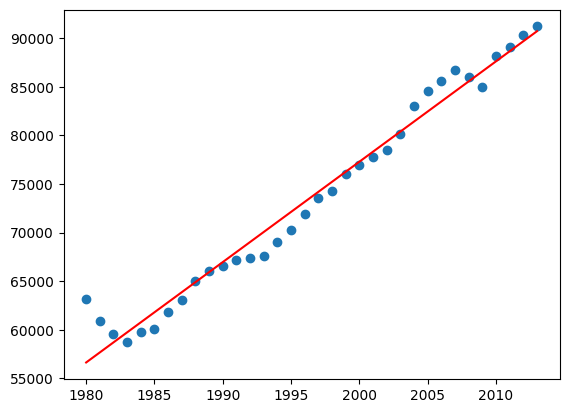

In [4]:
b_consumption = np.array([
        63122, 60953, 59551, 58785, 59795, 60083, 61819, 63107, 64978, 66090,
        66541, 67186, 67396, 67619, 69006, 70258, 71880, 73597, 74274, 75975,
        76928, 77732, 78457, 80089, 83063, 84558, 85566, 86724, 86046, 84972,
        88157, 89105, 90340, 91195 ], dtype=np.float64)

n = len(b_consumption)
############################# YOUR CODE STARTS HERE #######################
# year =
year = np.arange(1980, 2014).reshape(-1, 1)
#A_consumption =  # Generate the matrix A according to formula (9)
#    Hint: numpy.vstack, numpy.hstack, and numpy.ones may be useful for you;
#          check numpy doc (particularly their examples) to see how to use them
A_consumption = np.hstack((year, np.ones((n, 1))))
#x_hat_consumption  = mySolver(A_consumption,b_consumption)
x_hat_consumption = mySolver(A_consumption, b_consumption)
###########################################################################

# plot the line fitting
plt.figure()
plt.scatter(np.arange(1980,2014), b_consumption)
plt.plot(np.arange(1980,2014), A_consumption @ x_hat_consumption, 'r')
plt.show()

**1.3** (Extra-credit) Data fitting with multiple features

In [5]:
import House_Sales_Data

D = House_Sales_Data.house_sales_data()
beds = np.array(D['beds']).reshape([-1,1])
sizes = np.array(D['area']).reshape([-1,1])
prices = np.array(D['price']).reshape([-1,1])
n_houses = prices.shape[0]

############################# YOUR CODE STARTS HERE #######################
# A_houses =  # Generate the matrix A according to formula (9)
#    Hint: numpy.vstack, numpy.hstack, and numpy.zeros may be useful for you;
#          check numpy doc (particularly their examples) to see how to use them
A_houses = np.hstack((beds, sizes, np.ones((n_houses, 1))))
# x_hat_houses  =  # find x_hat_houses using the mySolver function an
x_hat_houses = mySolver(A_houses, prices)
# avg_diff =  # compute the average difference between your predicted prices and the actual prices
predicted_prices = A_houses @ x_hat_houses
avg_diff = np.mean(np.abs(prices - predicted_prices))
###########################################################################

print(f"Value of x_hat for house data:\n {x_hat_houses}\n")
print(f"Value of x_hat for house data:\n {x_hat_houses}\n")
print(f"Average price difference: {avg_diff:.2f}")
print(f"Average price difference relative to the average housing prices (should be less than 30%):")
print(f"{avg_diff/np.average(prices)*100:.2f}%")

Value of x_hat for house data:
 [[-18.85335788]
 [148.7250726 ]
 [ 54.4016736 ]]

Value of x_hat for house data:
 [[-18.85335788]
 [148.7250726 ]
 [ 54.4016736 ]]

Average price difference: 55.58
Average price difference relative to the average housing prices (should be less than 30%):
24.29%
